In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-tracking-germany/de_state.shp
/kaggle/input/covid19-tracking-germany/de_county.prj
/kaggle/input/covid19-tracking-germany/de_state.dbf
/kaggle/input/covid19-tracking-germany/de_state.cpg
/kaggle/input/covid19-tracking-germany/covid_de.csv
/kaggle/input/covid19-tracking-germany/de_county.cpg
/kaggle/input/covid19-tracking-germany/de_state.shx
/kaggle/input/covid19-tracking-germany/demographics_de.csv
/kaggle/input/covid19-tracking-germany/de_county.dbf
/kaggle/input/covid19-tracking-germany/de_county.shx
/kaggle/input/covid19-tracking-germany/de_state.prj
/kaggle/input/covid19-tracking-germany/de_county.shp


In [160]:
covid = pd.read_csv('/kaggle/input/covid19-tracking-germany/covid_de.csv')
covid.head()

427618

In [137]:
covid['date'] = pd.to_datetime(covid['date'], format = '%Y-%m-%d')
covid.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [138]:
covid_bw = covid[covid['state'] == 'Baden-Wuerttemberg']
covid_bw.groupby('county')['cases'].count().reset_index()

,county,cases
0,LK Alb-Donau-Kreis,1269
1,LK Biberach,1110
2,LK Bodenseekreis,979
3,LK Boeblingen,1657
4,LK Breisgau-Hochschwarzwald,1379
5,LK Calw,1173
6,LK Emmendingen,1109
7,LK Enzkreis,1294
8,LK Esslingen,1973
9,LK Freudenstadt,965


In [139]:
covid_hd = covid[covid['county'] == 'SK Heidelberg']
covid_hd.groupby('age_group')['cases'].sum()

age_group
00-04      83
05-14     202
15-34    1300
35-59    1012
60-79     333
80-99     177
Name: cases, dtype: int64

In [140]:
covid_hd.head()

,state,county,age_group,gender,date,cases,deaths,recovered
47463,Baden-Wuerttemberg,SK Heidelberg,00-04,F,2020-08-05,2,0,2
47464,Baden-Wuerttemberg,SK Heidelberg,00-04,F,2020-08-16,1,0,1
47465,Baden-Wuerttemberg,SK Heidelberg,00-04,F,2020-08-22,1,0,1
47466,Baden-Wuerttemberg,SK Heidelberg,00-04,F,2020-09-01,1,0,1
47467,Baden-Wuerttemberg,SK Heidelberg,00-04,F,2020-09-03,2,0,2


In [141]:
from matplotlib import pyplot as plt
import seaborn as sns

In [142]:
covid_hd_cases = covid_hd.groupby('date')['cases'].sum().reset_index()
covid_hd_cases

,date,cases
0,2020-03-04,2
1,2020-03-06,2
2,2020-03-09,1
3,2020-03-11,2
4,2020-03-12,2
...,...,...
213,2021-01-01,36
214,2021-01-02,11
215,2021-01-03,16
216,2021-01-04,21


In [143]:
covid_hd_deaths = covid_hd.groupby('date')['deaths'].sum().reset_index()
covid_hd_deaths

,date,deaths
0,2020-03-04,0
1,2020-03-06,0
2,2020-03-09,0
3,2020-03-11,0
4,2020-03-12,0
...,...,...
213,2021-01-01,0
214,2021-01-02,0
215,2021-01-03,0
216,2021-01-04,0


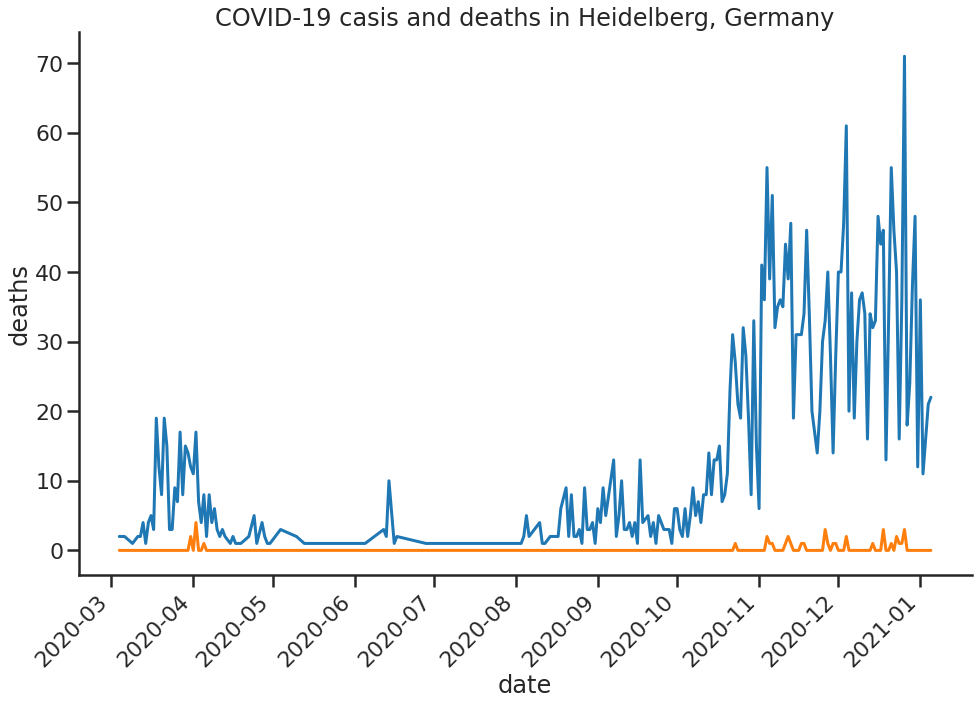

In [144]:
plt.figure(figsize=(16,10))
sns.set_style('ticks')
sns.set_context("poster")
ax = sns.lineplot(data=covid_hd_cases, x='date', y='cases', ci=None)
ax = sns.lineplot(data=covid_hd_deaths, x='date', y='deaths', ci=None)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('COVID-19 casis and deaths in Heidelberg, Germany')
sns.despine()
plt.show()

In [155]:
covid_hd_by_age = covid_hd.groupby(['age_group', 'gender'])['cases'].sum().reset_index()
covid_hd_by_age['gender'] = covid_hd_by_age['gender'].replace(['F'],'Female').replace(['M'],'Male')
covid_hd_by_age

,age_group,gender,cases
0,00-04,Female,39
1,00-04,Male,42
2,05-14,Female,94
3,05-14,Male,108
4,15-34,Female,661
5,15-34,Male,631
6,35-59,Female,509
7,35-59,Male,499
8,60-79,Female,167
9,60-79,Male,166


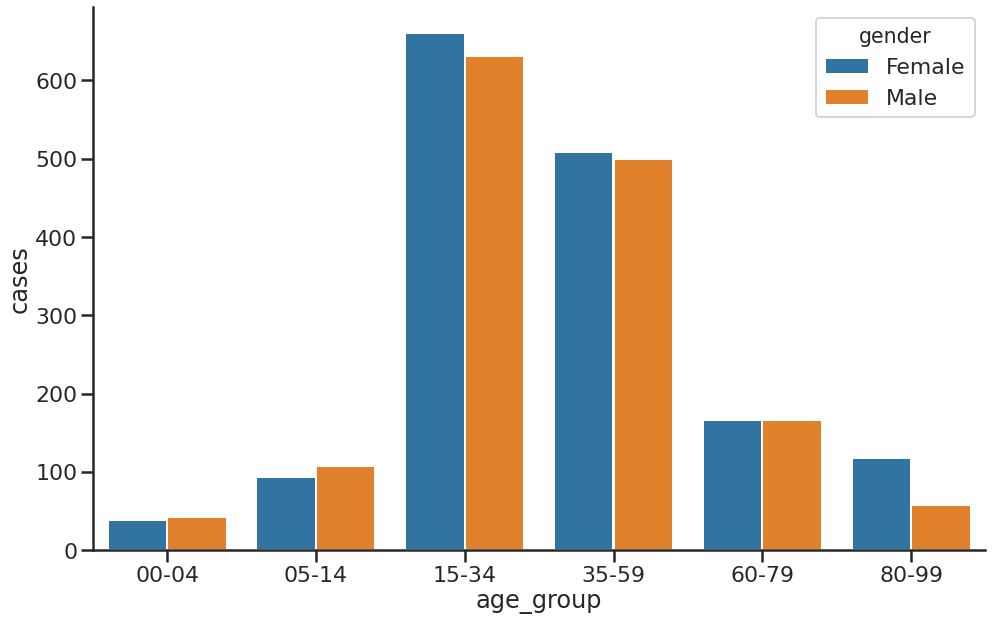

In [154]:
plt.figure(figsize=(16,10))
sns.set_style('ticks')
#sns.set_context("poster")
ax = sns.barplot(data=covid_hd_by_age, x='age_group', y='cases', hue='gender')
#plt.xticks(rotation=45, horizontalalignment='right')
#plt.title('COVID-19 casis and deaths in Heidelberg, Germany')
sns.despine()
plt.show()

In [156]:
covid_hd_death_by_age = covid_hd.groupby(['age_group', 'gender'])['deaths'].sum().reset_index()
covid_hd_death_by_age['gender'] = covid_hd_by_age['gender'].replace(['F'],'Female').replace(['M'],'Male')
covid_hd_death_by_age

,age_group,gender,deaths
0,00-04,Female,0
1,00-04,Male,0
2,05-14,Female,0
3,05-14,Male,0
4,15-34,Female,0
5,15-34,Male,0
6,35-59,Female,1
7,35-59,Male,2
8,60-79,Female,1
9,60-79,Male,9


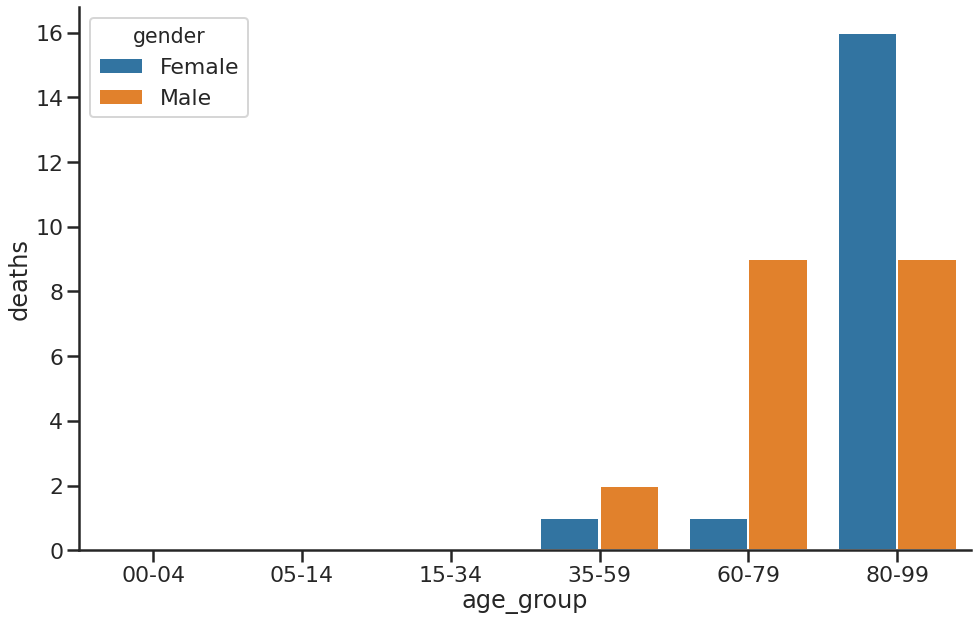

In [159]:
plt.figure(figsize=(16,10))
sns.set_style('ticks')
#sns.set_context("poster")
ax = sns.barplot(data=covid_hd_death_by_age, x='age_group', y='deaths', hue='gender')
#plt.xticks(rotation=45, horizontalalignment='right')
#plt.title('COVID-19 casis and deaths in Heidelberg, Germany')
sns.despine()
plt.show()